In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file2 = pd.read_csv('./data/isee_machine_data_20180901_to_20190331_C123.csv')

## str -> datetime으로 변환
v2 = file2['creationTime'].tolist()
date = []
date1 = []
for v in v2:
    dt = datetime.datetime.strptime(v, '%m/%d/%Y %H:%M')
    date.append(dt)
    
    dt2 = dt.strftime('%Y-%m-%d')
    date1.append(dt2)
file2['creationTime'] = date
file2['creationDate'] = date1

file2.head()

,ModuleCount,creationTime,CycleTime,VpPosition,VpTime,VpPressure,MaxInjectionPressure,InjectionEndPosition,PlasticizingTime,PlasticsEndPosotion,ClampingTime,MouldOpeningTime,HotOilContoller,TankTemp,NozzleTemp,Zone1,Zone2,Zone3,Zone4,creationDate
0,513812,2019-03-29 19:59:00,34.64,23.0,2.59,54,72,0.0,0.00,78.7,2.91,4.36,279.5,31,291,285,281,275,265,2019-03-29
1,513811,2019-03-29 19:59:00,34.64,23.0,2.59,54,72,20.4,11.59,78.7,2.91,4.31,279.5,31,295,285,280,275,265,2019-03-29
2,513810,2019-03-29 19:58:00,34.64,23.0,2.59,54,72,14.1,11.32,78.7,2.90,4.29,279.5,31,289,285,280,275,265,2019-03-29
3,513809,2019-03-29 19:58:00,34.64,23.0,2.59,54,72,14.3,11.34,78.7,2.90,4.29,279.4,31,289,285,280,275,265,2019-03-29
4,513808,2019-03-29 19:57:00,34.64,23.0,2.59,54,72,14.7,11.48,78.7,2.90,4.19,279.5,31,296,286,280,275,265,2019-03-29


In [5]:
############################################ 시작 시간 리스트: idx_list에는 시작점에 대한 인덱스가 들어있음
break_time_all = []
break_time1 = []

idx_list10 = [] # 10분 텀
short_idx_list = []   # 30분 텀
idx_list = [] # 1시간 텀
long_idx_list = [] # 5시간 텀

for x in range(len(file2)-1):
    td = file2['creationTime'][x]-file2['creationTime'][x+1]
    break_time_all.append(td.seconds/60)
    if td.seconds > 60*10:
        idx_list10.append(x+1)
        if td.seconds > 60*30:
            short_idx_list.append(x+1)
            if td.seconds > 60*60: # 60초 *  60분
                idx_list.append(x+1)
                break_time1.append(td.seconds/60)
                if td.seconds > 60*60*5:
                    long_idx_list.append(x+1)

# 마지막점 추가
idx_list10.append(len(file2))
short_idx_list.append(len(file2))
idx_list.append(len(file2))
long_idx_list.append(len(file2))

# 초기점 추가
idx_list10.insert(0, 0)
short_idx_list.insert(0, 0)
idx_list.insert(0, 0)
long_idx_list.insert(0, 0)

importing Jupyter notebook from isee_def.ipynb


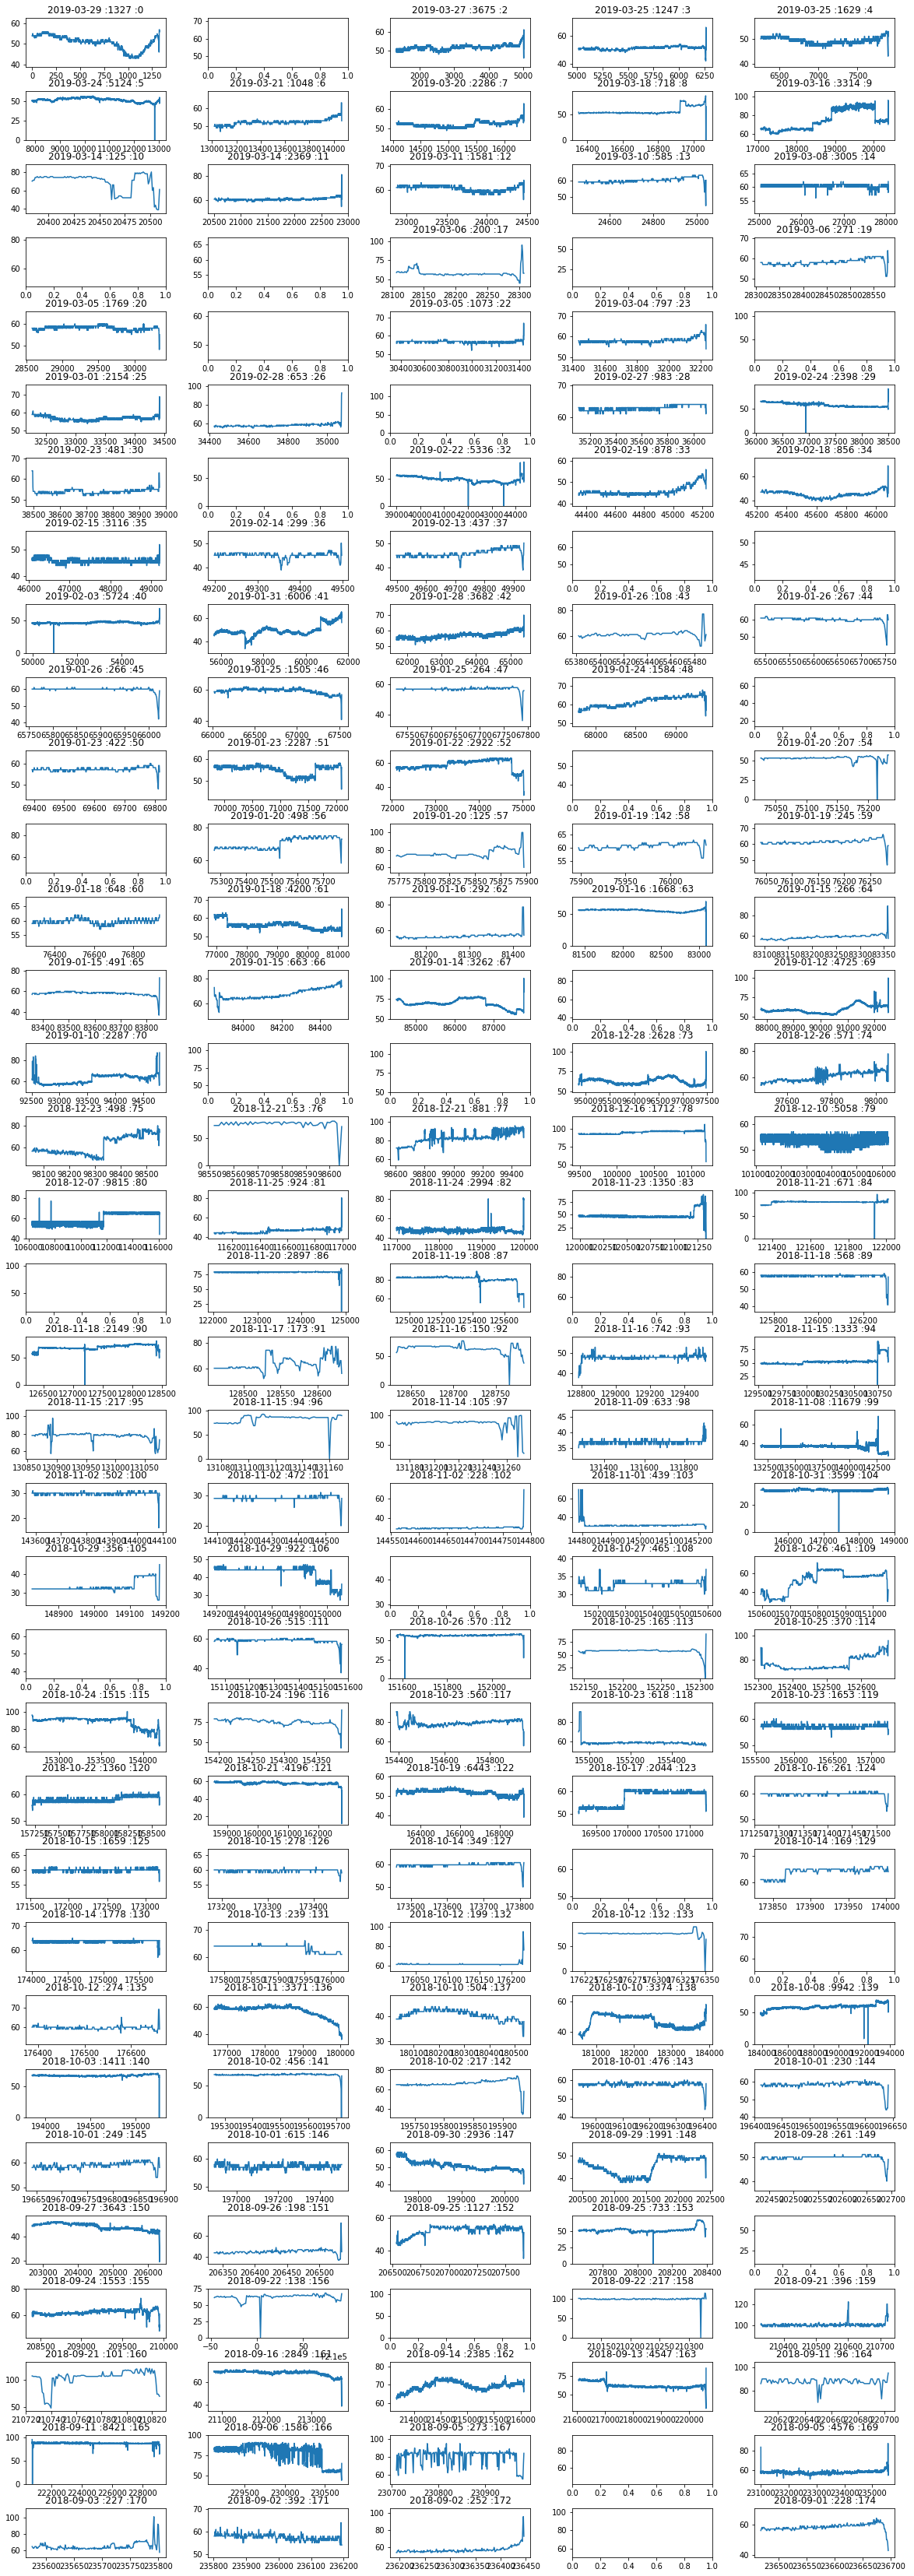

In [6]:
import import_ipynb
from isee_def import plot_1column
plot_1column(file2, 'VpPressure', short_idx_list)

라벨 달기

In [12]:
label = []
for n in range(len(idx_list)-1):
    ary = file2['creationTime'][idx_list[n]:idx_list[n+1]]
    first = idx_list[n+1]-1
    last = idx_list[n]
    after30 = ary[first] + datetime.timedelta(minutes = 30)
    before30 = ary[last] - datetime.timedelta(minutes = 30)
    for x in ary.index:
        if ary[x]>= before30:
            label.append(2)
        elif ary[x]< before30 and ary[x] > after30:
            label.append(1) 
        elif ary[x]<= after30:
            label.append(0) 

In [13]:
df2 = file2.copy()
df2['Label'] = label
df2

,ModuleCount,creationTime,CycleTime,VpPosition,VpTime,VpPressure,MaxInjectionPressure,InjectionEndPosition,PlasticizingTime,PlasticsEndPosotion,...,MouldOpeningTime,HotOilContoller,TankTemp,NozzleTemp,Zone1,Zone2,Zone3,Zone4,creationDate,Label
0,513812,2019-03-29 19:59:00,34.64,23.0,2.59,54,72,0.0,0.00,78.7,...,4.36,279.5,31,291,285,281,275,265,2019-03-29,2
1,513811,2019-03-29 19:59:00,34.64,23.0,2.59,54,72,20.4,11.59,78.7,...,4.31,279.5,31,295,285,280,275,265,2019-03-29,2
2,513810,2019-03-29 19:58:00,34.64,23.0,2.59,54,72,14.1,11.32,78.7,...,4.29,279.5,31,289,285,280,275,265,2019-03-29,2
3,513809,2019-03-29 19:58:00,34.64,23.0,2.59,54,72,14.3,11.34,78.7,...,4.29,279.4,31,289,285,280,275,265,2019-03-29,2
4,513808,2019-03-29 19:57:00,34.64,23.0,2.59,54,72,14.7,11.48,78.7,...,4.19,279.5,31,296,286,280,275,265,2019-03-29,2
5,513807,2019-03-29 19:56:00,34.64,23.0,2.59,55,72,14.0,11.52,78.7,...,3.93,279.6,31,288,286,281,275,265,2019-03-29,2
6,513806,2019-03-29 19:56:00,34.64,23.0,2.59,54,72,14.3,11.58,78.7,...,3.93,279.7,31,294,286,280,275,265,2019-03-29,2
7,513805,2019-03-29 19:55:00,33.86,23.0,2.59,55,72,19.6,11.46,78.7,...,3.95,279.6,31,289,286,280,275,265,2019-03-29,2
8,513804,2019-03-29 19:55:00,34.62,23.0,2.58,55,72,14.3,11.46,78.6,...,3.95,279.6,31,289,285,279,275,265,2019-03-29,2
9,513803,2019-03-29 19:54:00,34.62,23.0,2.59,54,72,14.6,11.59,78.6,...,3.91,279.1,31,293,286,280,276,265,2019-03-29,2


### (-) 발생 날짜로 라벨링

In [159]:
label_0903 = []
for i in range(len(df2)):
    if df2['creationDate'][i] in ['2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06', '2018-09-08', '2018-09-09', '2018-09-14']:
        label_0903.append(1)
    else: label_0903.append(0)

In [14]:
df2[df2['Label']==2].shape, df2[df2['Label']==1].shape, df2[df2['Label']==0].shape

((7210, 21), (223040, 21), (6446, 21))

In [15]:
X_train = df2.drop(['ModuleCount','creationTime','creationDate','Label'], axis=1)

In [16]:
y_train = df2['Label']

In [17]:
end_df = df2[df2['Label']==2]
run_df =df2[df2['Label']==1]
start_df = df2[df2['Label']==0]

In [ ]:
idx_list

## 클러스터링

In [39]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)

C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\ARA\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


Inertia value를 이용한 적정 군집 수 판단. inertia_:가장 가까운 클러스터의 중심과 각 샘플의 거리 제곱 합

In [62]:
ks = range(1,10)
inertias = []

for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_train_std)
    inertias.append(kmeans.inertia_)

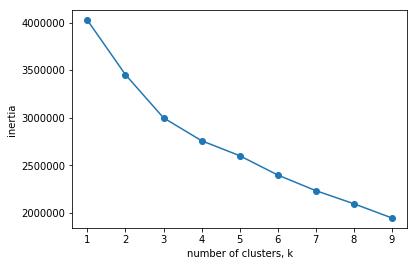

In [63]:
# Plot ks vs inertias

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [64]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X_train_std)

In [65]:
y_pred = kmeans.predict(X_train_std)

In [67]:
r = pd.DataFrame(y_pred, columns=['predict'])

In [66]:
len(y_train), (y_train != y_pred).sum()

(236696, 232398)

In [69]:
ct = pd.crosstab(df2['Label'],r['predict'])
print (ct)

predict      0    1      2      3
Label                            
0         1690  278   1630   2848
1        60097  701  65056  97186
2         1940  142   1907   3221


## T-SNE로 시각화

In [10]:
from sklearn.manifold import TSNE
import altair as alt
#alt.renderers.enable('jupyerlab')
import random

import import_ipynb
from isee_def import draw_tsne

In [149]:
n = 1000   # 랜덤으로 n개 추출
randIdx = random.sample(range(len(X_train_std)), n)

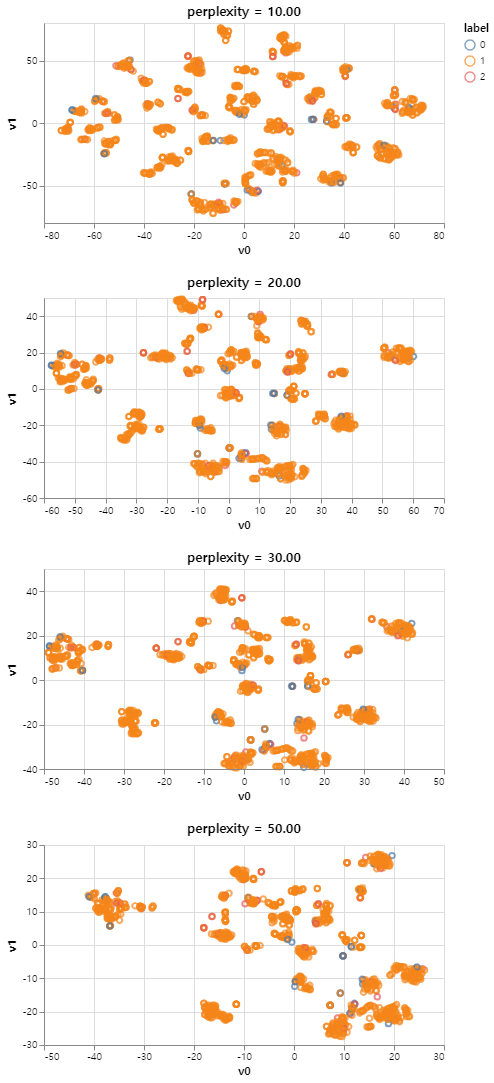

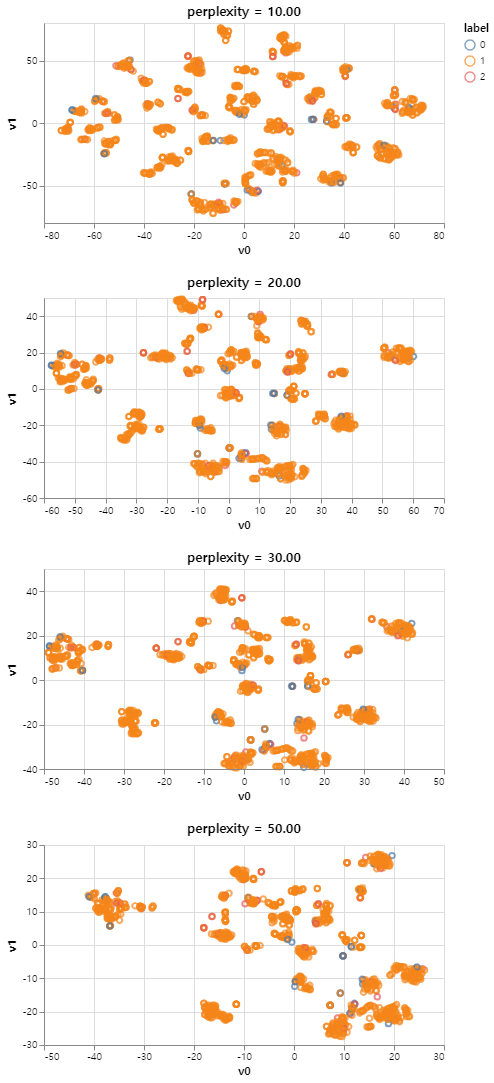

In [150]:
draw_tsne(X_train_std, y_train, randIdx)

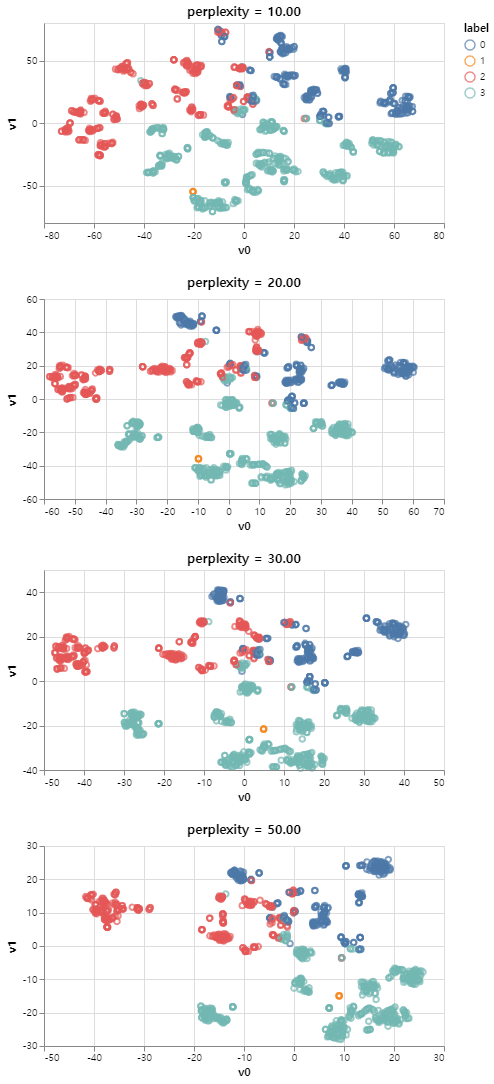

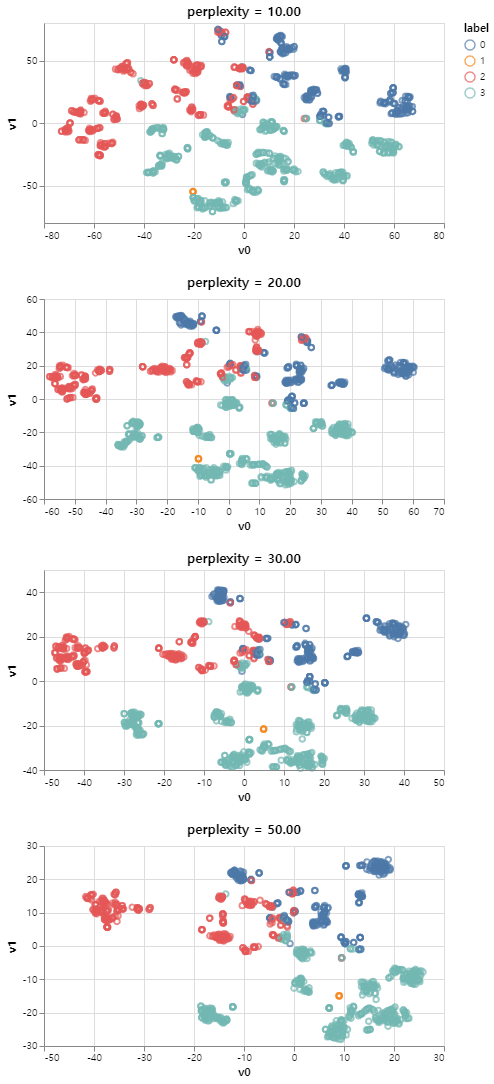

In [151]:
draw_tsne(X_train_std, y_pred, randIdx)

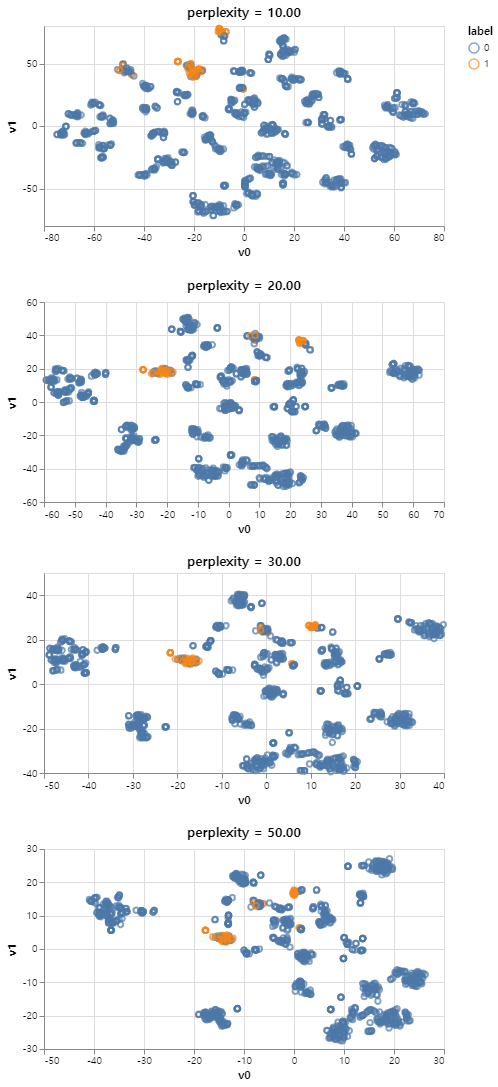

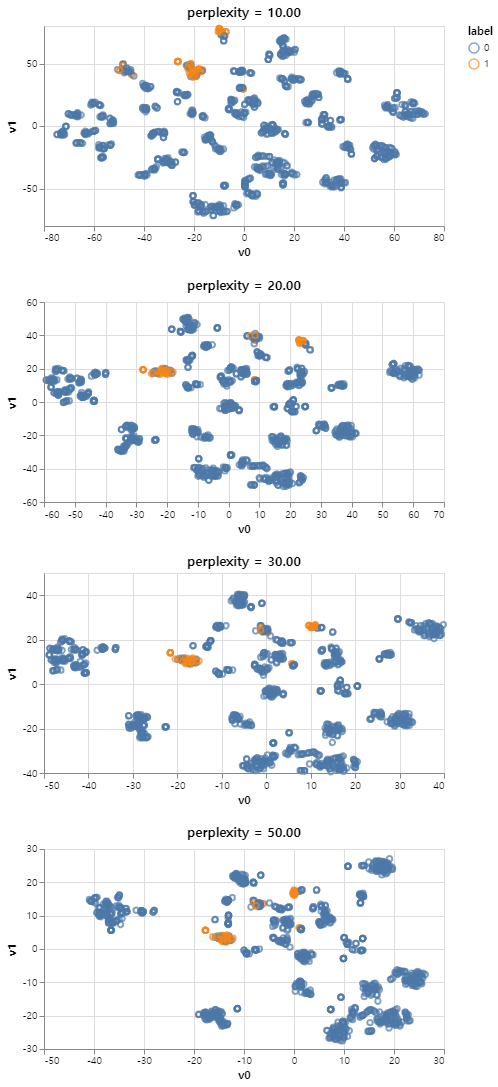

In [160]:
draw_tsne(X_train_std, label_0903, randIdx)

In [48]:
kmeans.cluster_centers_.shape

(3, 17)

In [52]:
im = np.array(list(map(lambda x: x[:2], kmeans.cluster_centers_)))

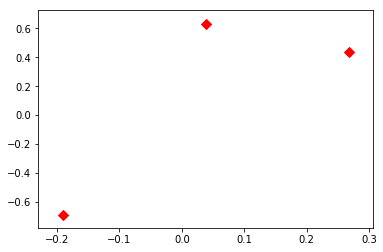

In [54]:
centers = pd.DataFrame(im,columns=['0','1'])

center_x = centers['0']

center_y = centers['1']

plt.scatter(center_x,center_y,s=50,marker='D',c='r')

plt.show()


In [24]:
from mlxtend.plotting import plot_decision_regions

In [28]:
im = list(map(lambda x: x[:2], X_train_std))

In [31]:
im = np.array(im)

ValueError: query data dimension must match training data dimension

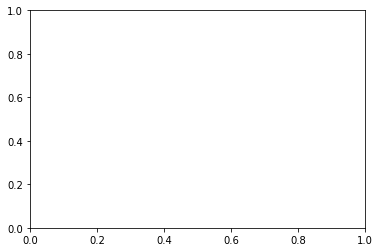

In [32]:
plot_decision_regions(X=im, y=np.array(y_train), clf=knn)

In [ ]:
fig = plt.figure(figsize=(20,40))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
x = 4  # 아래 v의 배수
q = 1

for n in [109, 110, 114, 115]:    
    v = 1   #가로 갯수
    
    df = file2.loc[idx_list[n]:idx_list[n+1]]
    first = idx_list[n+1]-1
    last = idx_list[n]
    after30 = df['creationTime'][first] + datetime.timedelta(minutes = 30)
    before30 = df['creationTime'][last] - datetime.timedelta(minutes = 30)
    df = df[(df['creationTime']< before30)&(df['creationTime']> after30)]
    
    ax =fig.add_subplot(x/v, v, q)
    ax.set_ylim([40, 80])
    ax.plot( df['VpPressure'])
    ax.set_title(file2['creationDate'][idx_list[n]]+' :'+str(idx_list[n+1]-idx_list[n])+' :'+ str(n))

    #ax.set_xticklabels(df['creationTime'], rotation=70)

    q += 1